In [1]:
import re

import pandas as pd
from pathlib import Path
from ploting import *

In [8]:
root_path = "horeka-no-gpu-aware-mpi"

In [9]:
name_re = re.compile("(weak|strong)_scaling-d_(\d+)-n_(\d+)-([\w_]+)_comm-(gpu|cpu)-nodes_(\d+)")

In [10]:
time_re = re.compile("DURATION:\s*(\d+(\.\d+)?(e[+-]\d+)?)")

In [11]:
data = []
for file in Path(f"{root_path}/data").iterdir():
    if m := name_re.search(file.name):
        with open(file, "r") as input:
            if t_m := time_re.search(input.read()):
                duration = t_m.group(1)
                data.append({"scaling": m.group(1), "dim": m.group(2), "n": m.group(3), "comm_pattern": m.group(4),
                             "type": m.group(5), "nodes": m.group(6), "time": duration})
df = pd.DataFrame(data).drop(columns=["scaling", "type"]).astype({"dim": int, "n": int, "nodes": int, "time": float})
df

,dim,n,comm_pattern,nodes,time
0,3,100,stencil,1,0.217885
1,3,100,stencil,14,0.272332
2,3,100,stencil,2,0.230136
3,3,100,stencil,28,0.298205
4,3,100,stencil,4,0.236875
5,3,100,stencil,56,0.358276
6,3,100,stencil,7,0.245222
7,3,1000,stencil,1,0.223601
8,3,100000,stencil,4,0.404223
9,3,1000,stencil,14,0.274380


In [12]:
piv = df.pivot(index="nodes", columns=["dim", "comm_pattern", "n"], values="time")
piv = piv[piv.columns.sort_values()]
piv

dim                  3                                       
comm_pattern   stencil                                       
n              100       1000      10000     100000   1000000
nodes                                                        
1             0.217885  0.223601  0.238432  0.330533  1.02927
2             0.230136  0.235043  0.256149  0.389387  1.18321
4             0.236875  0.243379  0.263313  0.404223  1.20454
7             0.245222  0.251083  0.273109  0.413838  1.22144
14            0.272332  0.274380  0.295900  0.441482  1.86673
28            0.298205  0.299598  0.328916  0.482554  2.62198
56            0.358276  0.347082  0.385236  0.559371  1.63961

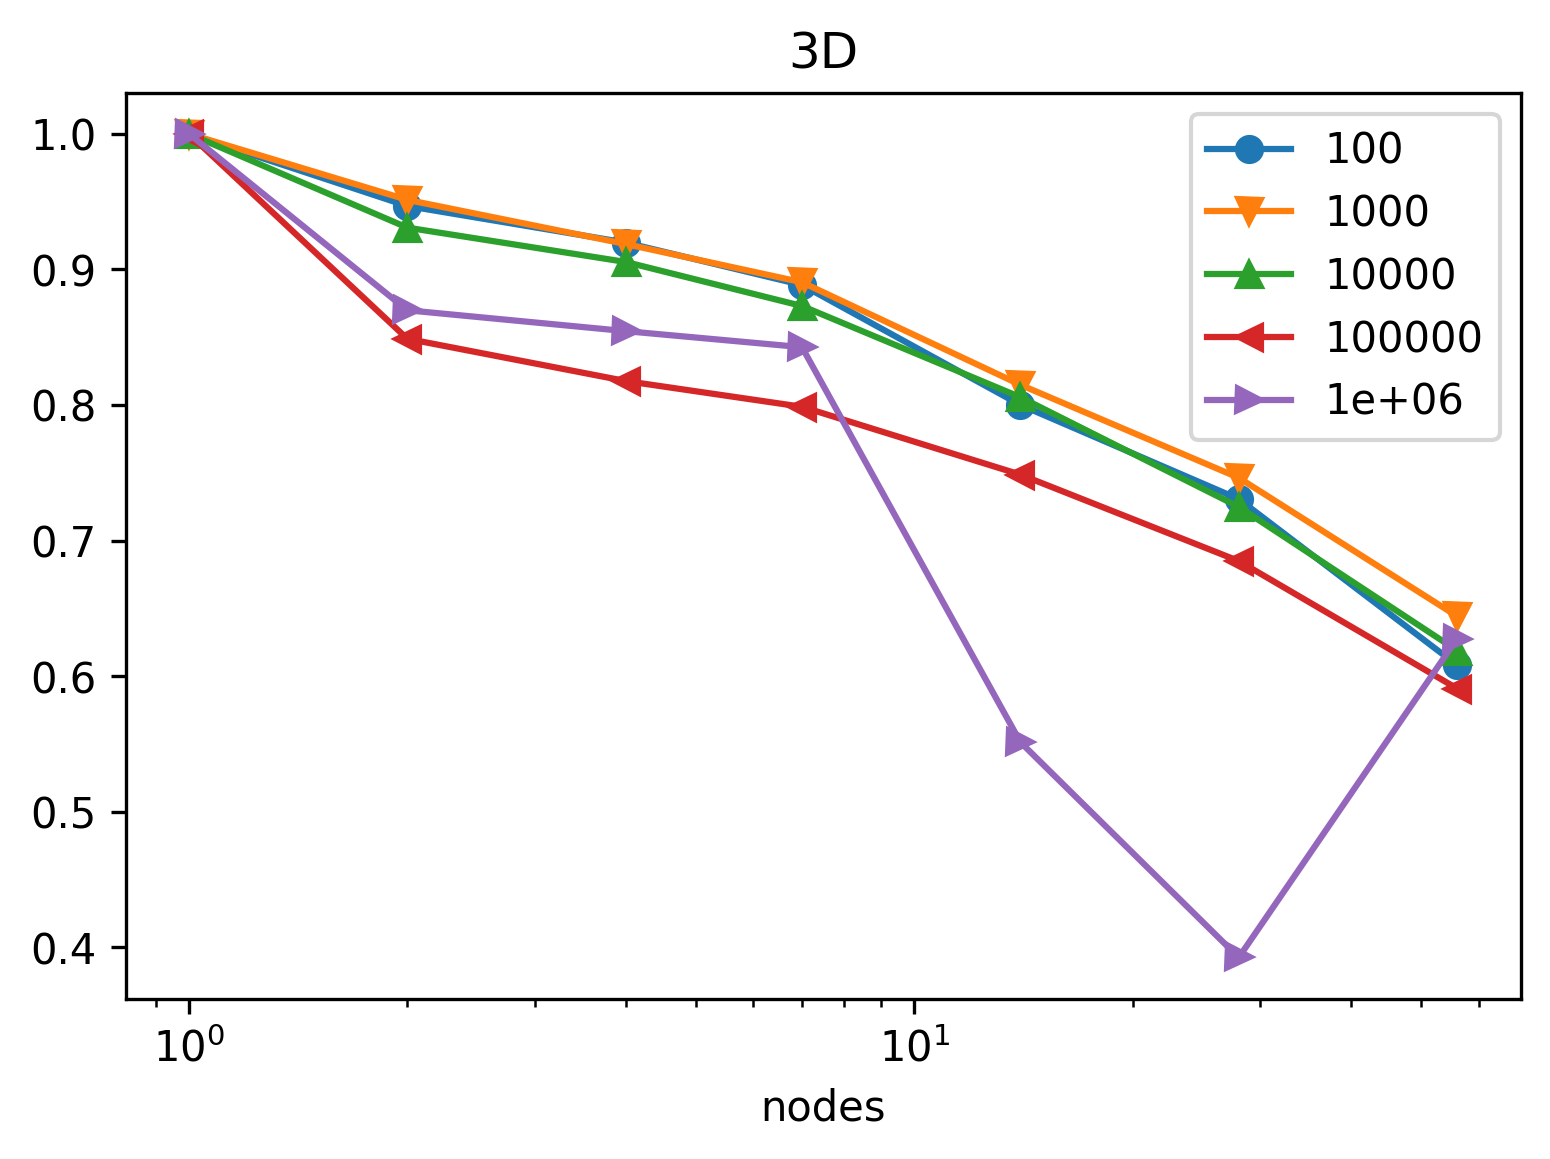

In [13]:
for dim in piv.columns.levels[0]:
    _df = piv[dim]
    fig, ax = plt.subplots(dpi=300)
    for gc in piv.columns.levels[1]:
        ax.set_prop_cycle(default_cycler)
        ax.set_title(f"{dim}D")
        _df[gc].apply(lambda s: s[1] / s).plot(ax=ax, legend=False, logx=True)
        ax.legend([f"{n:g}" for n in piv.columns.levels[2]])
    #fig.savefig(f"{root_path}/img/{dim}d.png")